In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.2/118.2 kB 9.8 MB

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from pycaret.classification import setup, compare_models

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
dataset = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
dataset['sex'] = dataset['sex'].astype(str) # male or female
dataset['cp'] = dataset['cp'].astype(str) # chest pain type (4 values)
dataset['fbs'] = dataset['fbs'].astype(str) # fasting blood sugar > 120 mg/dl (0 or 1)
dataset['restecg'] = dataset['restecg'].astype(str) # resting electrocardiographic results (values 0,1,2)
dataset['exang'] = dataset['exang'].astype(str)
dataset['slope'] = dataset['slope'].astype(str) # the slope of the peak exercise ST segment
dataset['ca'] = dataset['ca'].astype(str) # number of major vessels (0-3) colored by flourosopy
dataset['thal'] = dataset['thal'].astype(str) # thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
dataset['target'] = dataset['target'].astype(str) # Had Heart Disease?

In [7]:
dataset.describe(include = 'object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,1025,1025,1025,1025,1025,1025,1025,1025,1025
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,1,0,2,1
freq,713,497,872,513,680,482,578,544,526


In [8]:
dataset.describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


<Axes: >

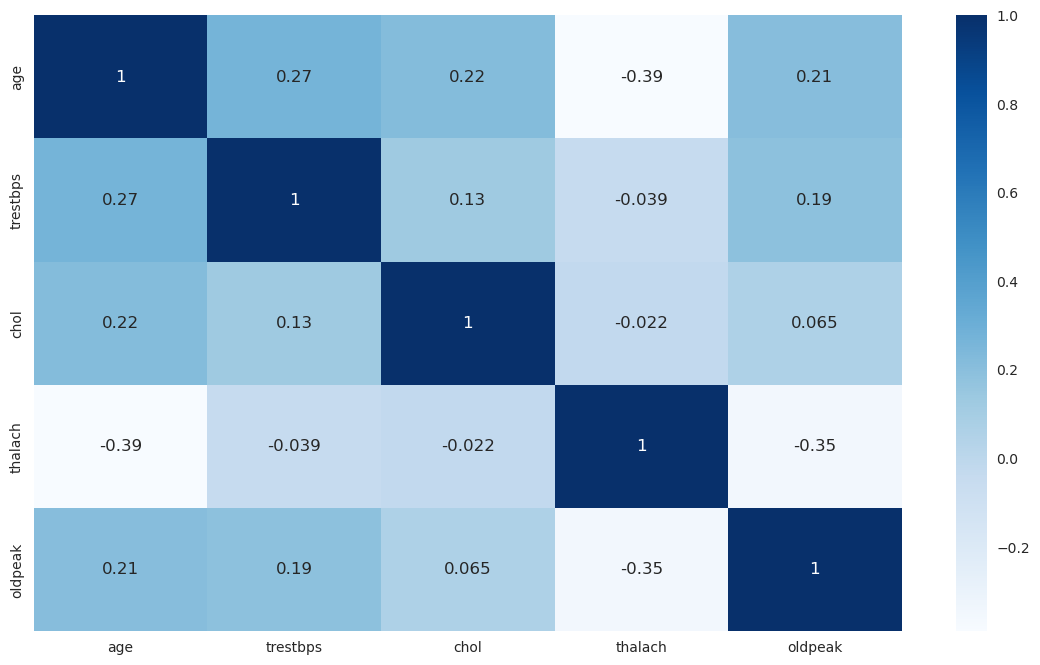

In [9]:
correlation = dataset.corr()
plt.figure(figsize = (14, 8))
sns.heatmap(correlation, annot = True, cmap = 'Blues')

In [10]:
numerical_columns = dataset.select_dtypes(np.number).columns

numerical_columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

<Axes: xlabel='age', ylabel='Density'>

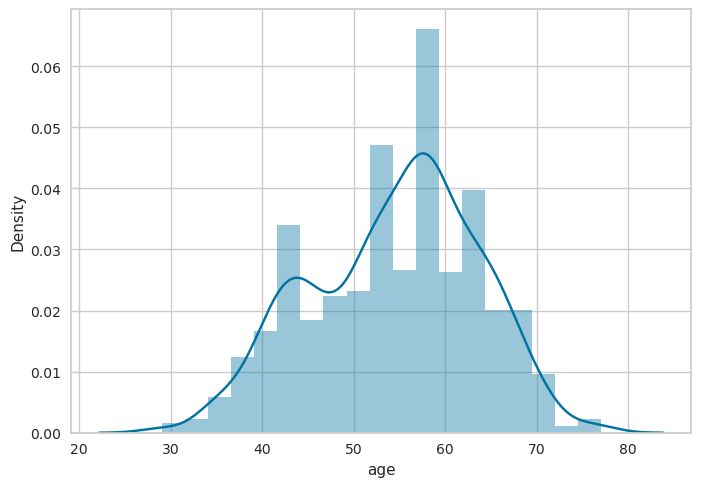

In [11]:
sns.distplot(dataset['age'])

<Axes: xlabel='trestbps', ylabel='Density'>

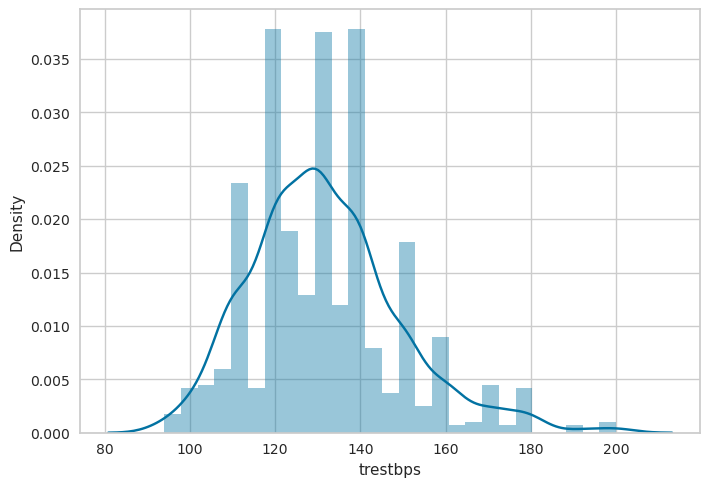

In [12]:
sns.distplot(dataset['trestbps'])

<Axes: xlabel='chol', ylabel='Density'>

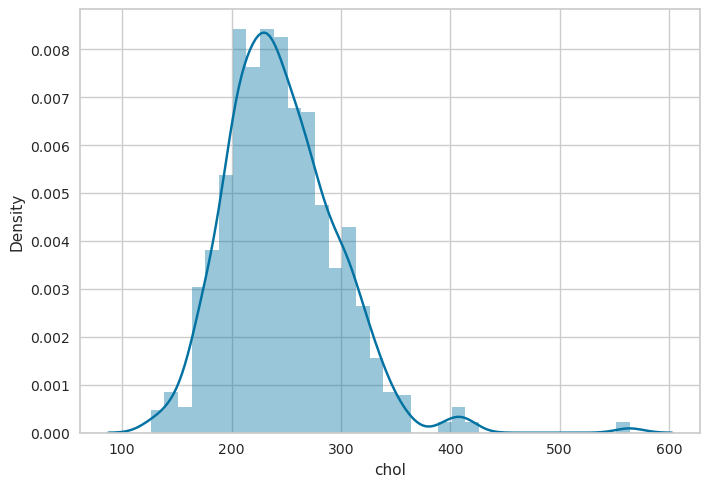

In [13]:
sns.distplot(dataset['chol'])

Analysis: Positivly skewed column

<Axes: xlabel='chol', ylabel='Density'>

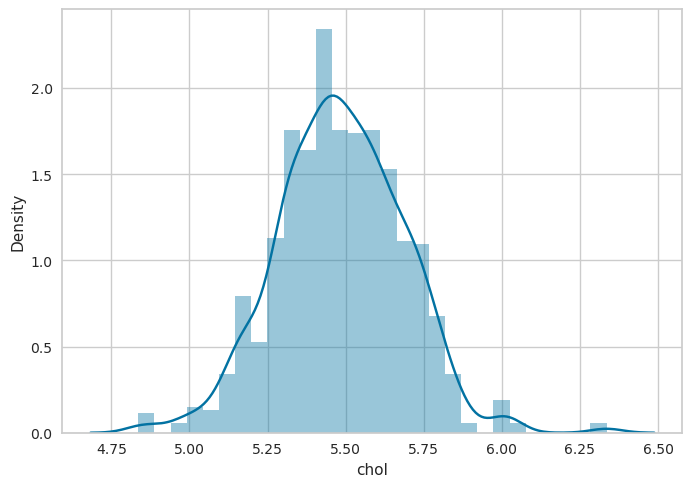

In [14]:
sns.distplot(np.log(dataset['chol']))

<Axes: xlabel='oldpeak', ylabel='Density'>

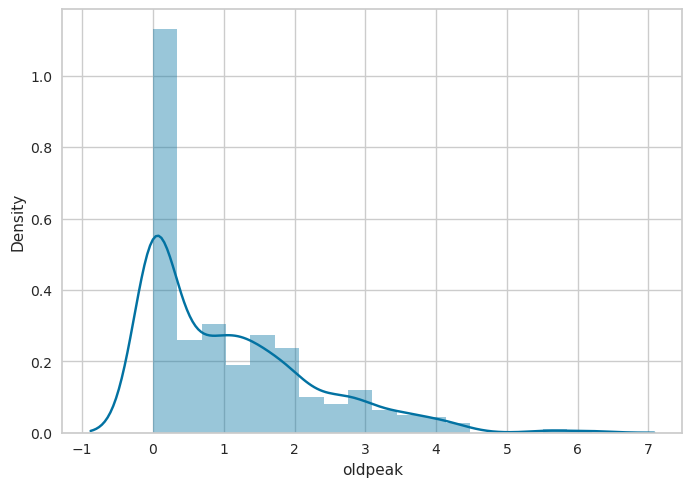

In [15]:
sns.distplot(dataset['oldpeak'])

<Axes: xlabel='oldpeak', ylabel='Density'>

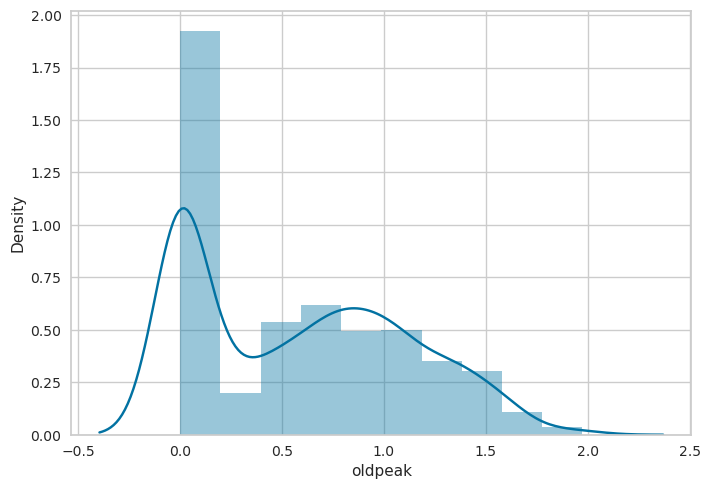

In [16]:
sns.distplot(np.log1p(dataset['oldpeak']))

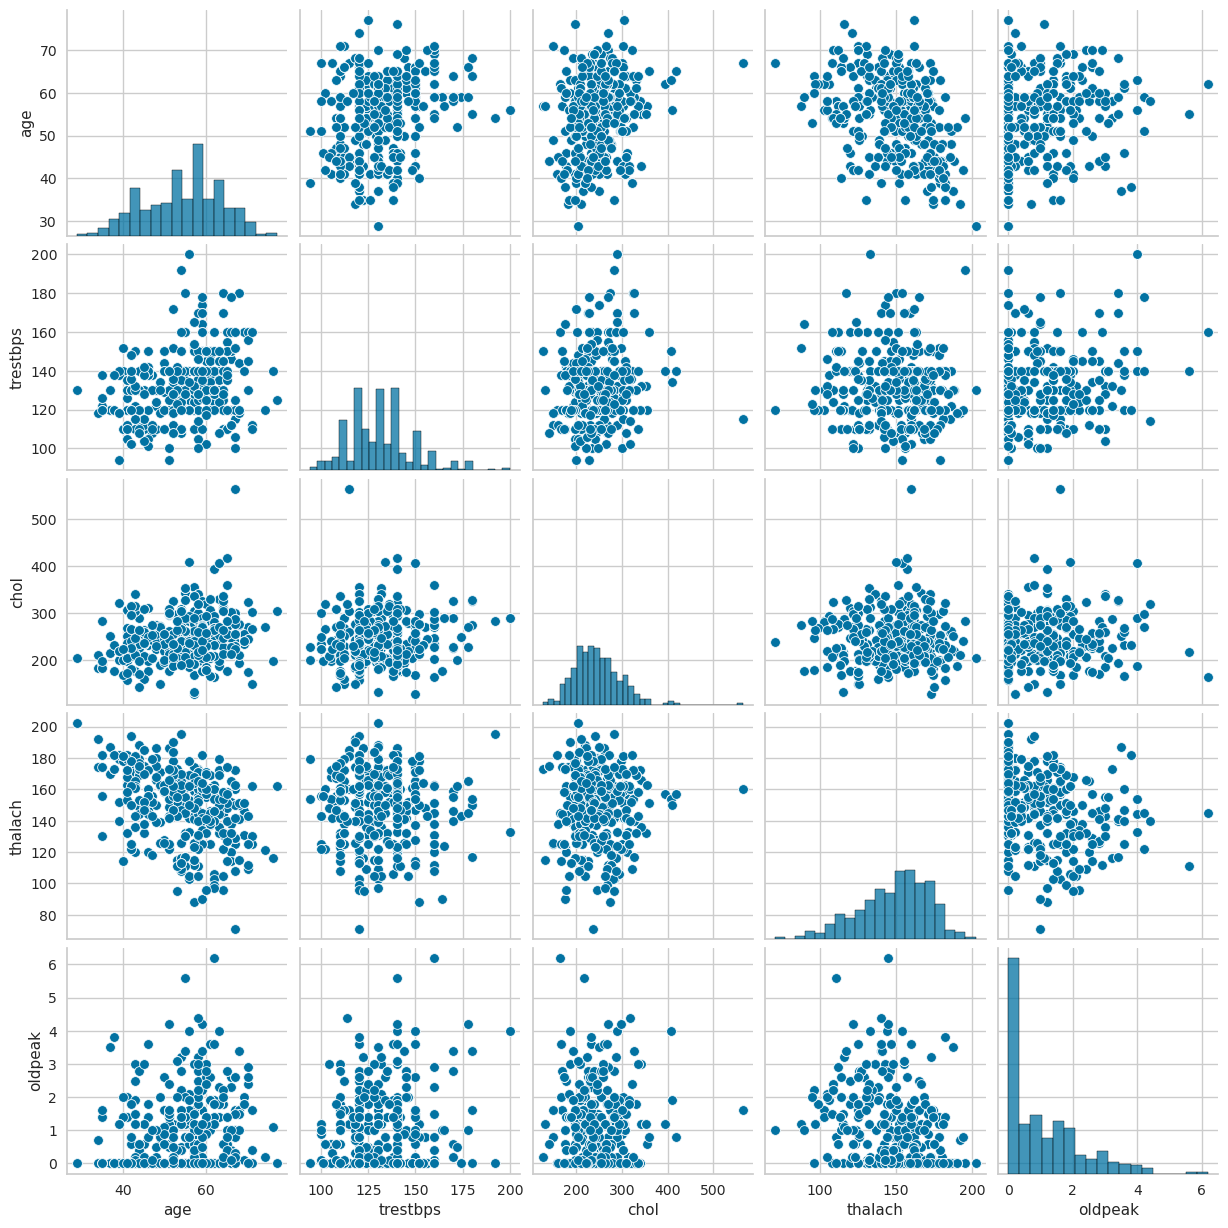

In [17]:
sns.pairplot(dataset)

In [18]:
# conclusion; log transform columns 'oldpeak' and 'col'
dataset['chol'] = dataset['chol'].apply(lambda x: np.log(x))
dataset['oldpeak'] = dataset['oldpeak'].apply(lambda x: np.log1p(x))

<Axes: xlabel='target', ylabel='age'>

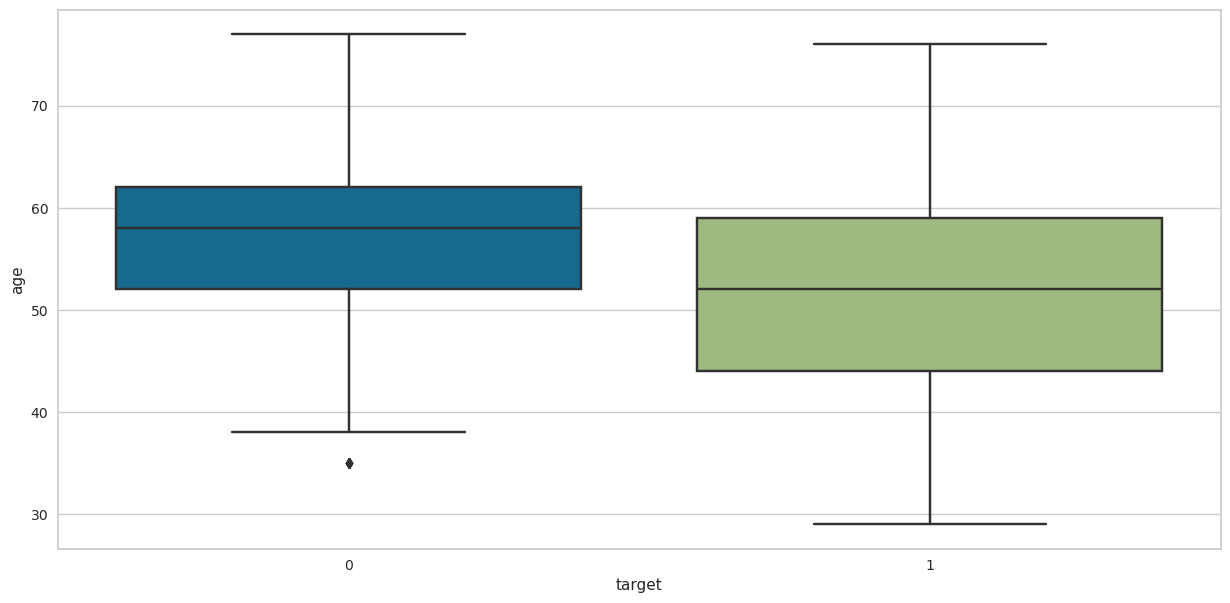

In [19]:
plt.figure(figsize = (15, 7))
sns.boxplot(y = dataset['age'], x = dataset['target'])

<Axes: xlabel='target', ylabel='oldpeak'>

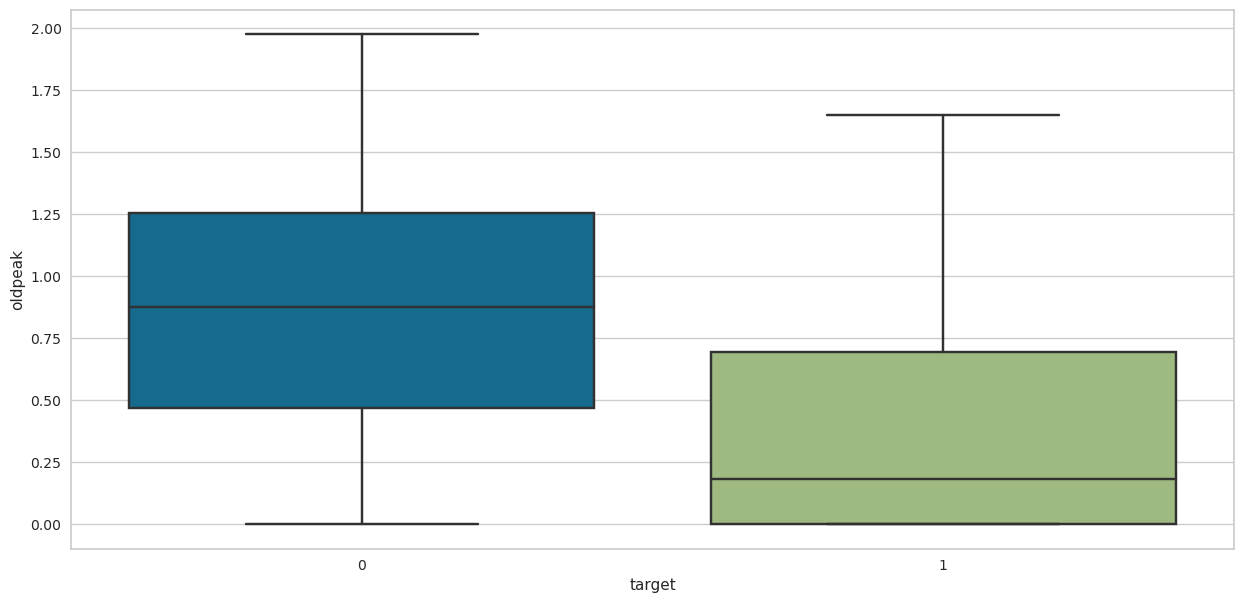

In [20]:
plt.figure(figsize = (15, 7))
sns.boxplot(y = dataset['oldpeak'], x = dataset['target'])

<Axes: xlabel='target', ylabel='trestbps'>

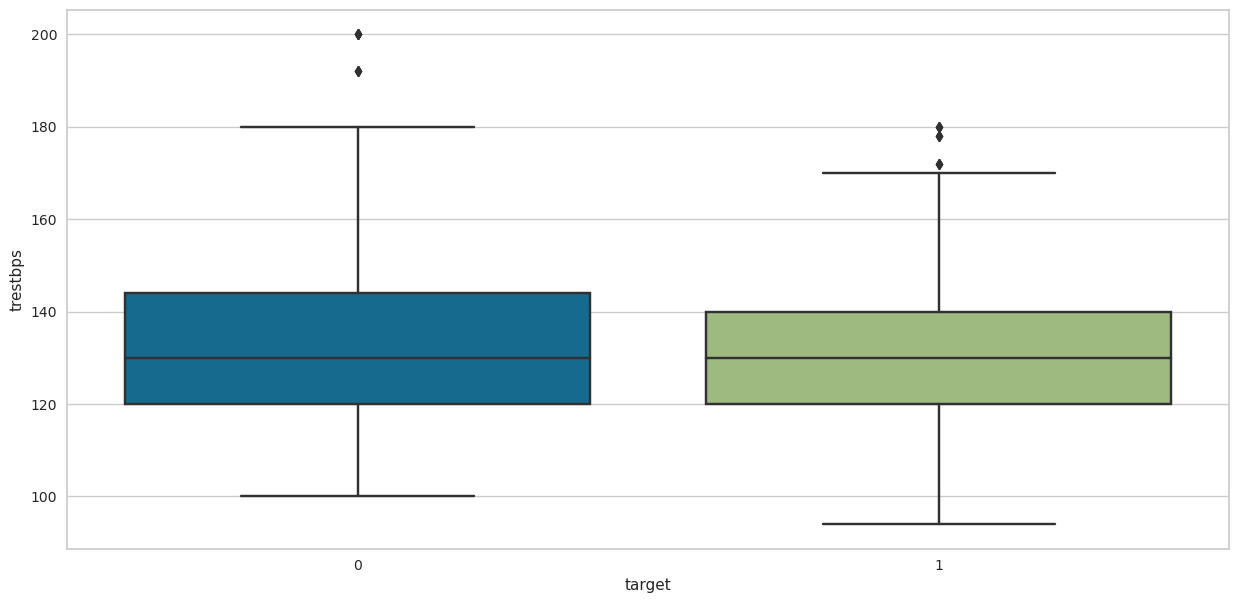

In [21]:
plt.figure(figsize = (15, 7))
sns.boxplot(y = dataset['trestbps'], x = dataset['target'])

In [22]:
from scipy import stats
 
z = np.abs(stats.zscore(dataset['age']))
z[:5]

0    0.268437
1    0.158157
2    1.716595
3    0.724079
4    0.834359
Name: age, dtype: float64

In [23]:
threshold = 2
 
# Position of the outlier
np.where(z > threshold)[0]

array([ 12,  15,  60,  64,  99, 118, 143, 160, 162, 201, 254, 256, 281,
       298, 313, 384, 387, 483, 501, 535, 572, 590, 666, 668, 695, 699,
       701, 711, 724, 779, 841, 846, 912, 965])

In [24]:
dataset.drop(np.where(z > threshold)[0], axis = 0, inplace = True)

In [25]:
categorical_columns = dataset.select_dtypes('object').columns

categorical_columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal',
       'target'],
      dtype='object')

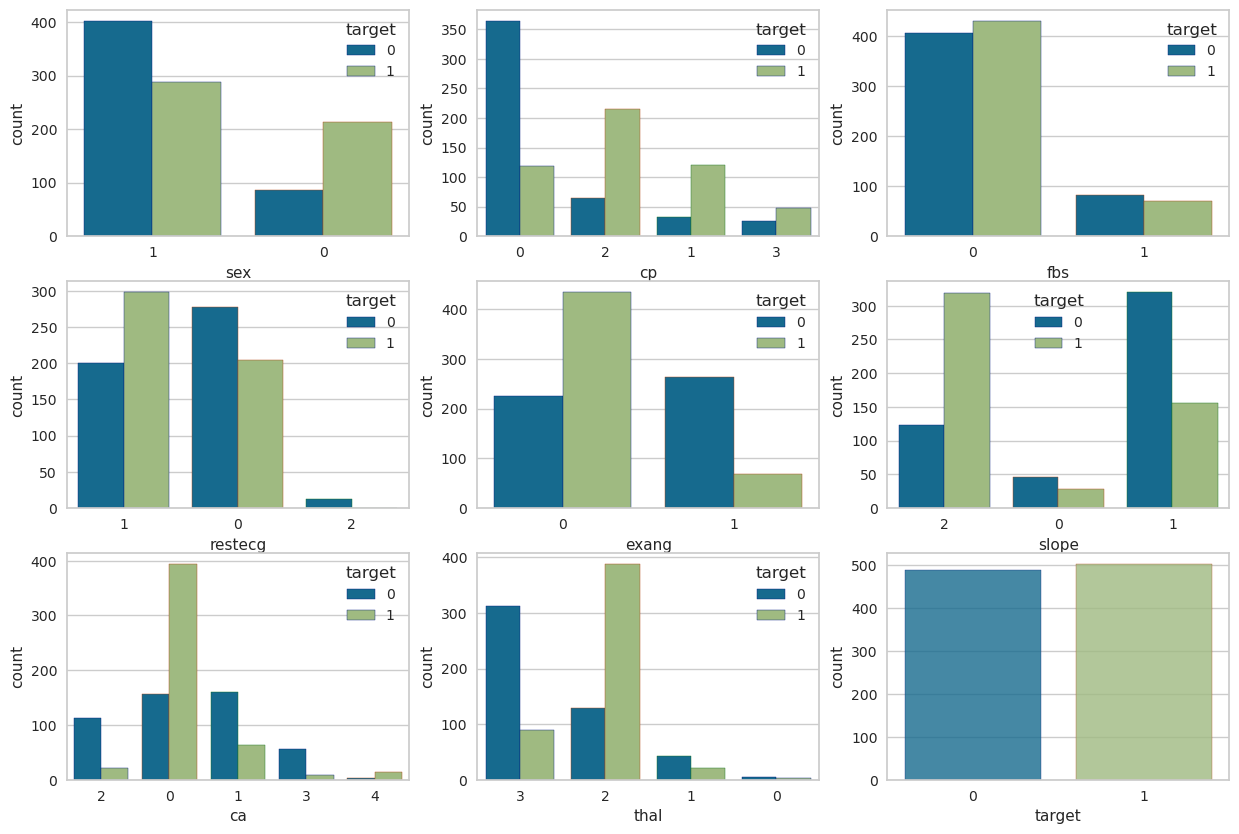

In [26]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

sns.countplot(data = dataset, x = 'sex', hue = 'target', 
                  ax = ax[0,0], edgecolor=sns.color_palette("dark", 3))
sns.countplot(data = dataset, x = 'cp', hue = 'target', 
                  ax = ax[0,1], edgecolor=sns.color_palette("dark", 3))
sns.countplot(data = dataset, x = 'fbs', hue = 'target', 
                  ax = ax[0,2], edgecolor=sns.color_palette("dark", 3))
sns.countplot(data = dataset, x = 'restecg', hue = 'target', 
                  ax = ax[1,0], edgecolor=sns.color_palette("dark", 3))
sns.countplot(data = dataset, x = 'exang', hue = 'target', 
                  ax = ax[1,1], edgecolor=sns.color_palette("dark", 3))
sns.countplot(data = dataset, x = 'slope', hue = 'target', 
                  ax = ax[1,2], edgecolor=sns.color_palette("dark", 3))
sns.countplot(data = dataset, x = 'ca', hue = 'target', 
                  ax = ax[2,0], edgecolor=sns.color_palette("dark", 3))
sns.countplot(data = dataset, x = 'thal', hue = 'target', 
                  ax = ax[2,1], edgecolor=sns.color_palette("dark", 3))
sns.countplot(data = dataset, x = 'target', alpha=0.8,
                  ax = ax[2,2], edgecolor=sns.color_palette("dark", 3))

plt.show()

In [27]:
data0 = dataset.sample(frac = 1, random_state = 0).copy()

X = data0.iloc[:, :-1]
y = data0['target']

In [28]:
X = pd.get_dummies(X)

X.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
735,50,129,5.278115,163,0.000000,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
749,58,125,5.393628,144,0.336472,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
33,70,160,5.594711,112,1.360977,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
352,57,110,5.814131,143,1.386294,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
795,62,128,5.337538,140,0.000000,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0


In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state= 0, test_size = 0.1)

In [30]:
sc = StandardScaler()
sc.fit(x_train)

x_train = pd.DataFrame(sc.transform(x_train), columns = x_train.columns, index = x_train.index)
x_test = pd.DataFrame(sc.transform(x_test), columns = x_test.columns, index = x_test.index)

In [31]:
x_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
557,-0.792456,-0.551212,-0.408931,1.634991,-1.103777,-0.650633,0.650633,1.028463,-0.426260,-0.629724,-0.287445,0.428097,-0.428097,1.003373,-0.981099,-0.10654,0.698197,-0.698197,-0.282843,-0.952850,1.105416,0.886325,-0.536258,-0.392613,-0.261429,-0.139466,-0.088986,-0.271098,0.954996,-0.817643
209,0.883553,-0.665044,0.774070,-2.017734,0.549198,-0.650633,0.650633,-0.972324,2.345986,-0.629724,-0.287445,0.428097,-0.428097,1.003373,-0.981099,-0.10654,0.698197,-0.698197,-0.282843,1.049483,-0.904637,-1.128255,1.864775,-0.392613,-0.261429,-0.139466,-0.088986,-0.271098,-1.047125,1.223028
3,0.763838,0.928609,-0.858040,0.534773,-1.103777,-0.650633,0.650633,1.028463,-0.426260,-0.629724,-0.287445,0.428097,-0.428097,-0.996639,1.019265,-0.10654,0.698197,-0.698197,-0.282843,-0.952850,1.105416,-1.128255,1.864775,-0.392613,-0.261429,-0.139466,-0.088986,-0.271098,-1.047125,1.223028
553,-0.193882,-0.095882,-1.008638,0.138694,0.384911,-0.650633,0.650633,-0.972324,-0.426260,1.587998,-0.287445,-2.335920,2.335920,1.003373,-0.981099,-0.10654,0.698197,-0.698197,3.535534,-0.952850,-0.904637,0.886325,-0.536258,-0.392613,-0.261429,-0.139466,-0.088986,-0.271098,0.954996,-0.817643
163,-0.792456,-0.437380,0.647444,0.754817,-0.338217,-0.650633,0.650633,1.028463,-0.426260,-0.629724,-0.287445,0.428097,-0.428097,1.003373,-0.981099,-0.10654,0.698197,-0.698197,-0.282843,1.049483,-0.904637,0.886325,-0.536258,-0.392613,-0.261429,-0.139466,-0.088986,-0.271098,-1.047125,1.223028


In [32]:
y_train = y_train.astype(str)
y_test = y_test.astype(str)

In [33]:
data_final = X.copy()
data_final['target'] = y.astype(str)

In [34]:
setup(data = data_final, target = 'target')

,Description,Value
0,Session id,5609
1,Target,target
2,Target type,Binary
3,Target mapping,"0: 0, 1: 1"
4,Original data shape,"(991, 31)"
5,Transformed data shape,"(991, 31)"
6,Transformed train set shape,"(693, 31)"
7,Transformed test set shape,"(298, 31)"
8,Numeric features,30
9,Preprocess,True


In [35]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9754,0.9979,0.9857,0.9676,0.9762,0.9508,0.9516,0.3190
rf,Random Forest Classifier,0.9711,0.9943,0.9800,0.9645,0.9719,0.9422,0.9429,0.3460
catboost,CatBoost Classifier,0.9711,0.9895,0.9800,0.9645,0.9719,0.9422,0.9429,1.9220
dt,Decision Tree Classifier,0.9668,0.9667,0.9714,0.9647,0.9675,0.9335,0.9346,0.0500
lightgbm,Light Gradient Boosting Machine,0.9667,0.9905,0.9714,0.9643,0.9675,0.9335,0.9343,0.4670
xgboost,Extreme Gradient Boosting,0.9653,0.9865,0.9686,0.9642,0.9660,0.9306,0.9313,0.1470
gbc,Gradient Boosting Classifier,0.9436,0.9822,0.9514,0.9394,0.9451,0.8872,0.8879,0.2310
ada,Ada Boost Classifier,0.8945,0.9615,0.9029,0.8927,0.8970,0.7890,0.7904,0.2020
ridge,Ridge Classifier,0.8787,0.0000,0.9259,0.8510,0.8861,0.7570,0.7615,0.0390
lda,Linear Discriminant Analysis,0.8787,0.9356,0.9259,0.8510,0.8861,0.7570,0.7615,0.0530


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=5609, verbose=0, warm_start=False)

In [36]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)
kf = KFold(n_splits = 10)
scores = cross_val_score(clf, X, data_final['target'], cv = kf, scoring = 'accuracy')

print(f'Model trained with cv and scored mean of {scores.mean()}, with standard deviation of {scores.std()}')

Model trained with cv and scored mean of 1.0, with standard deviation of 0.0
